### Introduction
 
Within this notebook, we aim to comprehensively investigate the Smart metered electricity consumption data, obtained from LECO for the Lacuna project

### Step 0: Imports and Reading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
plt.style.use('ggplot')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

'''Load the LA Social safety nets sample data'''

df_one = pd.read_csv('/Users/chanukaalgama/Desktop/DAP PROJECTS/Lacuna/Analysis_on_the_SSN_Sample/lacuna-analytics/Data/LOAD_PROFILE_HISTORICAL_READINGS_INVENTORY_20_12_2023 - 50 meters.csv')
df_two = pd.read_csv('/Users/chanukaalgama/Desktop/DAP PROJECTS/Lacuna/Analysis_on_the_SSN_Sample/lacuna-analytics/Data/LOAD_PROFILE_HISTORICAL_READINGS_INVENTORY_20_12_2023 - 50 meters (1).csv')


In [2]:
print(df_one.shape, df_two.shape)

'''Combining two dataframes of the same shape'''
frames = [df_one, df_two]
df = pd.concat(frames)
df.shape

(196092, 24) (178352, 24)


(374444, 24)

### Step 1: Data Understanding

- Column list
- Feature Definitions
- Dataframe shape
- Head and tail
- dtypes
- describe

In [61]:
df.columns

Index(['SERIAL', 'CUSTOMER_REF', 'TIMESTAMP', 'OBIS', 'Date', 'Time',
       'Import kWh (kWh)', 'Export kWh (kWh)', 'Import kvarh (kvarh)',
       'Export kvarh (kvarh)', 'Phase A Inst. Current (A)',
       'Phase B Inst. Current (A)', 'Phase C Inst. Current (A)',
       'Phase A Inst. Voltage (V)', 'Phase B Inst. Voltage (V)',
       'Phase C Inst. Voltage (V)', 'Phase ABC Power factor',
       'Avg. Import kW (kW)', 'Avg. Export kW (kW)', 'Avg. Import kVA (kVA)',
       'Avg. Export kVA (kVA)', 'Avg. Current (V)', 'Avg. Voltage (V)',
       'Inst. Power factor'],
      dtype='object')

#### Understanding on the field definitions thus far
***
SERIAL: Unique identifier for each record in the dataset.<br>
CUSTOMER_REF: Customer reference or identifier for the household.<br>
TIMESTAMP: Date and time when the data was recorded.<br>
OBIS: OBIS code is a numerical code which represents the physical quantity measured by the meter. Since all the values in this field in the dataset is 'LP'. It should be related to something on Smart meter <br>
Date: Date of the recorded data. <br>
Time: Time of the recorded data. <br>
Import kWh (kWh): Imported energy consumption in kilowatt-hours. <br>
Export kWh (kWh): Exported energy consumption in kilowatt-hours (if applicable). <br>
Import kvarh (kvarh): Imported reactive energy consumption in kilovolt-ampere reactive hours.  Reactive power is the portion of apparent power that does no work but is stored and returned to the source. It is caused by inductive and capacitive loads. The term 'reactive' comes from the fact that it is reactive to changes in current and voltage. <br>
Export kvarh (kvarh): Exported reactive energy consumption in kilovolt-ampere reactive hours (if applicable). <br>
Phase A Inst. Current (A): Instantaneous current in Phase A in Amperes. <br>
Phase B Inst. Current (A): Instantaneous current in Phase B in Amperes. <br>
Phase C Inst. Current (A): Instantaneous current in Phase C in Amperes. <br>
Phase A Inst. Voltage (V): Instantaneous voltage in Phase A in Volts. <br>
Phase B Inst. Voltage (V): Instantaneous voltage in Phase B in Volts. <br>
Phase C Inst. Voltage (V): Instantaneous voltage in Phase C in Volts. <br>
Phase ABC Power factor: Power factor for the combined three-phase system. <br>
Avg. Import kW (kW): Average imported power in kilowatts. <br>
Avg. Export kW (kW): Average exported power in kilowatts (if applicable). <br>
Avg. Import kVA (kVA): Average imported apparent power in kilovolt-amperes. <br>
Avg. Export kVA (kVA): Average exported apparent power in kilovolt-amperes (if applicable). <br>
Avg. Current (V): Average current in Amperes. <br>
Avg. Voltage (V): Average voltage in Volts. <br>
Inst. Power factor: Instantaneous power factor. <br>

In [62]:
df.head(10)

,SERIAL,CUSTOMER_REF,TIMESTAMP,OBIS,Date,Time,Import kWh (kWh),Export kWh (kWh),Import kvarh (kvarh),Export kvarh (kvarh),...,Phase B Inst. Voltage (V),Phase C Inst. Voltage (V),Phase ABC Power factor,Avg. Import kW (kW),Avg. Export kW (kW),Avg. Import kVA (kVA),Avg. Export kVA (kVA),Avg. Current (V),Avg. Voltage (V),Inst. Power factor
0,18300063,502549410,1.696100e+12,LP,2023-10-01,00:00:00,378.2700,1686.66,1749.9000,45.340,...,236.5000,235.8000,0.485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22301360,205337605,1.696100e+12,LP,2023-10-01,00:00:00,3470.9270,0.00,469.5460,170.619,...,242.1001,235.5000,0.885,0.4758,0.0,0.5399,0.0,NaN,NaN,NaN
2,22302222,505792111,1.696100e+12,LP,2023-10-01,00:00:00,5.6531,0.00,0.5230,2.490,...,227.9000,234.8000,1.000,0.0000,0.0,0.0000,0.0,NaN,NaN,NaN
3,22302790,211240909,1.696100e+12,LP,2023-10-01,00:00:00,86.5780,0.00,0.1830,14.714,...,238.7001,238.6001,0.244,0.0015,0.0,0.0059,0.0,NaN,NaN,NaN
4,18300063,502549410,1.696100e+12,LP,2023-10-01,00:15:00,378.2800,1686.66,1749.9000,45.350,...,233.5000,234.7000,0.487,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,22301360,205337605,1.696100e+12,LP,2023-10-01,00:15:00,3470.9910,0.00,469.5920,170.619,...,236.2001,234.3000,0.658,0.2577,0.0,0.3705,0.0,NaN,NaN,NaN
6,22302222,505792111,1.696100e+12,LP,2023-10-01,00:15:00,5.6531,0.00,0.5230,2.490,...,226.4000,236.5000,1.000,0.0000,0.0,0.0000,0.0,NaN,NaN,NaN
7,22302712,303111303,1.696100e+12,LP,2023-10-01,00:15:00,243.7440,0.00,87.8231,13.799,...,238.3000,238.1001,0.797,0.1424,0.0,0.1789,0.0,NaN,NaN,NaN
8,22302790,211240909,1.696100e+12,LP,2023-10-01,00:15:00,86.5780,0.00,0.1830,14.714,...,238.6001,238.4000,0.246,0.0015,0.0,0.0059,0.0,NaN,NaN,NaN
9,18300063,502549410,1.696100e+12,LP,2023-10-01,00:30:00,378.2800,1686.66,1749.9000,45.360,...,233.6000,234.2000,0.491,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374444 entries, 0 to 178351
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SERIAL                     374444 non-null  int64  
 1   CUSTOMER_REF               374444 non-null  int64  
 2   TIMESTAMP                  374444 non-null  float64
 3   OBIS                       374444 non-null  object 
 4   Date                       374444 non-null  object 
 5   Time                       374444 non-null  object 
 6   Import kWh (kWh)           374444 non-null  float64
 7   Export kWh (kWh)           374444 non-null  float64
 8   Import kvarh (kvarh)       52765 non-null   float64
 9   Export kvarh (kvarh)       52765 non-null   float64
 10  Phase A Inst. Current (A)  149680 non-null  float64
 11  Phase B Inst. Current (A)  52765 non-null   float64
 12  Phase C Inst. Current (A)  52765 non-null   float64
 13  Phase A Inst. Voltage (V)  149680 

In [35]:
'''Identifying Categorical variables'''
df.describe(include="O")

,OBIS,Date,Time
count,374444,374444,374444
unique,1,74,96
top,LP,2023-12-11,07:15:00
freq,374444,8327,3989


In [5]:
'''Converting Date and Time to correct format'''
df['date_time_clean'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['date_time_clean']


0        2023-10-01 00:00:00
1        2023-10-01 00:00:00
2        2023-10-01 00:00:00
3        2023-10-01 00:00:00
4        2023-10-01 00:15:00
                 ...        
178347   2023-12-13 19:45:00
178348   2023-12-13 20:00:00
178349   2023-12-13 20:15:00
178350   2023-12-13 20:30:00
178351   2023-12-13 20:45:00
Name: date_time_clean, Length: 374444, dtype: datetime64[ns]

In [37]:
'''OBIS has only one value across all entries'''
df["OBIS"].value_counts()

OBIS
LP    374444
Name: count, dtype: int64

In [65]:
'''Dataset spans over 74 days and has the required timestamps in date_time_cleaned which is 7099 (should be 4 x 24 x 74 = 7104)'''
df.nunique()

SERIAL                           99
CUSTOMER_REF                     99
TIMESTAMP                       640
OBIS                              1
Date                             74
Time                             96
Import kWh (kWh)             262374
Export kWh (kWh)              12962
Import kvarh (kvarh)          29341
Export kvarh (kvarh)          22615
Phase A Inst. Current (A)     12177
Phase B Inst. Current (A)      8289
Phase C Inst. Current (A)      9008
Phase A Inst. Voltage (V)       556
Phase B Inst. Voltage (V)       440
Phase C Inst. Voltage (V)       444
Phase ABC Power factor         2090
Avg. Import kW (kW)           13238
Avg. Export kW (kW)            8012
Avg. Import kVA (kVA)         12745
Avg. Export kVA (kVA)          2807
Avg. Current (V)              11781
Avg. Voltage (V)                429
Inst. Power factor             1187
date_time_clean                7099
dtype: int64

### Step 2: Data Preparation

- Checking whether the households in this dataset are included in the sample we are a surveying 
- Identifying households that doesnt have data rows for all the expected date-time combinations
- Combining two data frames
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Feature Creation
- summation of null values
- df queries

In [66]:
'''Checking whether the households in this dataset are included in the list of households we are a surveying '''

#loading the list of households we are surveying
df_list = pd.read_csv('/Users/chanukaalgama/Desktop/DAP PROJECTS/Lacuna/Analysis_on_the_SSN_Sample/lacuna-analytics/Data/LA_lacuna_sample.csv')


all_account_nos_included = df['CUSTOMER_REF'].isin(df_list['ACCOUNT_NO']).all()

if all_account_nos_included:
    print("All households in this LECO dataset are inclued in the sample we are surveying.")
else:
    print("Not all households in this LECO dataset are inclued in the sample we are surveying.")



All households in this LECO dataset are inclued in the sample we are surveying.


In [101]:
'''Identifying households that doesnt have data rows for all the expected date-time combinations'''


# Creating a DataFrame with all expected date-time combinations

date_range = pd.date_range(start="2023-10-01", end="2023-12-14", freq="15T")

date_range

all_combinations = pd.DataFrame([(CUSTOMER_REF, date_time_clean) for CUSTOMER_REF in df['CUSTOMER_REF'].unique()  for date_time_clean in date_range], columns=['CUSTOMER_REF', 'date_time_clean'])

# Merging the original DataFrame with the expected combinations DataFrame

merged_df = pd.merge(all_combinations, df, on=['CUSTOMER_REF', 'date_time_clean'], how='left')


In [99]:
#clean the new dataframe

merged_df = merged_df[['CUSTOMER_REF', 'date_time_clean', 'Import kWh (kWh)', 'Export kWh (kWh)',
       'Import kvarh (kvarh)', 'Export kvarh (kvarh)',
       'Phase A Inst. Current (A)', 'Phase B Inst. Current (A)',
       'Phase C Inst. Current (A)', 'Phase A Inst. Voltage (V)',
       'Phase B Inst. Voltage (V)', 'Phase C Inst. Voltage (V)',
       'Phase ABC Power factor', 'Avg. Import kW (kW)', 'Avg. Export kW (kW)',
       'Avg. Import kVA (kVA)', 'Avg. Export kVA (kVA)', 'Avg. Current (V)',
       'Avg. Voltage (V)', 'Inst. Power factor']].copy

merged_df

<bound method NDFrame.copy of         CUSTOMER_REF     date_time_clean  Import kWh (kWh)  Export kWh (kWh)  \
0          502549410 2023-10-01 00:00:00            378.27           1686.66   
1          502549410 2023-10-01 00:15:00            378.28           1686.66   
2          502549410 2023-10-01 00:30:00            378.28           1686.66   
3          502549410 2023-10-01 00:45:00            378.29           1686.66   
4          502549410 2023-10-01 01:00:00            378.30           1686.66   
...              ...                 ...               ...               ...   
703390     707133405 2023-12-13 23:00:00               NaN               NaN   
703391     707133405 2023-12-13 23:15:00               NaN               NaN   
703392     707133405 2023-12-13 23:30:00               NaN               NaN   
703393     707133405 2023-12-13 23:45:00               NaN               NaN   
703394     707133405 2023-12-14 00:00:00               NaN               NaN   

        I

In [80]:
'''Important that Import KWh and Export KWh fields doesn't Null values'''
merged_df.isna().sum()

CUSTOMER_REF                      0
date_time_clean                   0
SERIAL                       328951
TIMESTAMP                    328951
OBIS                         328951
Date                         328951
Time                         328951
Import kWh (kWh)             328951
Export kWh (kWh)             328951
Import kvarh (kvarh)         650630
Export kvarh (kvarh)         650630
Phase A Inst. Current (A)    553715
Phase B Inst. Current (A)    650630
Phase C Inst. Current (A)    650630
Phase A Inst. Voltage (V)    553715
Phase B Inst. Voltage (V)    650630
Phase C Inst. Voltage (V)    650630
Phase ABC Power factor       425866
Avg. Import kW (kW)          335829
Avg. Export kW (kW)          335829
Avg. Import kVA (kVA)        560593
Avg. Export kVA (kVA)        560593
Avg. Current (V)             478631
Avg. Voltage (V)             478631
Inst. Power factor           606480
dtype: int64

### Step 3: Feature Understanding

- No of households with solar panals (or have exported electricity)
- Summary statistics

(Univariate analysis)

- Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot

- Energy Consumption Trends
       - Analyze daily, weekly, or monthly variations in energy usage.
- Exported Energy Analysis
       - Examine the 'Export kWh' column to understand instances of energy export, if applicable.
- Reactive Energy Assessment
       - One possible evaluation could be power factor trends to gauge system efficiency.
- Current and Voltage Profiles
       - Could analyse variations in current and voltage across phases (issues with uneven phase distribution.).
- Power Factor Analysis
       - Utilize 'Inst. Power factor' and 'Phase ABC Power factor'
- Average Power Metrics
       - Utilize 'Avg. Import kW', 'Avg. Export kW', 'Avg. Import kVA', and 'Avg. Export kVA' for average power consumption and power factor over specific periods.
       - Identify peak usage times and areas for energy efficiency improvements.

- Time-of-Use Analysis
- Correlation Analysis
        Energy consumption vs power factor
- Customer-Specific Analysis


In [45]:
'''No of households with solar panals or have exported electricity'''


# Group by 'CUSTOMER_REF' and check if at least one non-zero value exists in the 'export' column

non_zero_accounts = df.groupby('CUSTOMER_REF')['Export kWh (kWh)'].any().reset_index()

non_zero_accounts = non_zero_accounts[non_zero_accounts['Export kWh (kWh)']]



print("No of household that have exported power: ", len(non_zero_accounts))


No of household that have exported power:  18


In [46]:
df.describe()

,SERIAL,CUSTOMER_REF,TIMESTAMP,Import kWh (kWh),Export kWh (kWh),Import kvarh (kvarh),Export kvarh (kvarh),Phase A Inst. Current (A),Phase B Inst. Current (A),Phase C Inst. Current (A),...,Phase B Inst. Voltage (V),Phase C Inst. Voltage (V),Phase ABC Power factor,Avg. Import kW (kW),Avg. Export kW (kW),Avg. Import kVA (kVA),Avg. Export kVA (kVA),Avg. Current (V),Avg. Voltage (V),Inst. Power factor
count,3.744440e+05,3.744440e+05,3.744440e+05,374444.000000,374444.000000,52765.000000,52765.000000,149680.000000,52765.000000,52765.000000,...,52765.000000,52765.000000,277529.000000,367566.000000,367566.000000,142802.000000,142802.000000,224764.000000,224764.000000,96915.000000
mean,2.265172e+07,4.937756e+08,1.700258e+12,655.025587,182.674503,722.326459,50.590098,0.716819,0.217536,0.433251,...,236.123025,233.433104,0.738251,0.177887,0.042703,0.316841,0.041297,0.662031,233.400517,0.784368
std,7.378386e+05,2.101116e+08,1.378286e+09,766.524954,714.069522,1171.574907,64.262373,2.817268,3.894315,4.009188,...,6.835612,6.833125,0.380331,0.354107,0.332523,0.744720,0.350549,1.858564,5.098694,0.277211
min,1.830006e+07,2.027242e+08,1.696100e+12,0.000000,0.000000,0.000000,0.000000,-32.144000,-32.888000,-33.065000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-16.784000,132.800000,-1.000000
25%,2.270832e+07,3.017269e+08,1.699300e+12,147.819775,0.000000,70.633000,3.435000,0.000000,0.000000,0.013100,...,233.200100,230.300000,0.674000,0.005500,0.000000,0.011800,0.000000,0.055000,230.100100,0.680000
50%,2.272203e+07,5.057921e+08,1.700330e+12,393.675500,0.000000,334.233000,17.894100,0.425000,0.131000,0.121000,...,236.900000,234.000000,0.860000,0.099900,0.000000,0.184500,0.000000,0.485000,233.800000,0.852000
75%,2.273008e+07,7.055191e+08,1.701390e+12,933.630000,0.000000,589.487000,66.450000,1.130100,0.575100,0.543000,...,239.600100,237.200000,0.971000,0.202400,0.000000,0.306500,0.000000,0.948100,236.800000,0.987000
max,2.370810e+07,7.087936e+08,1.702490e+12,4404.588000,5665.330000,5299.990000,212.705000,48.164000,30.746000,32.354000,...,252.500000,251.800000,1.000000,7.469800,5.770100,10.262700,5.784900,24.351000,252.500000,1.000000


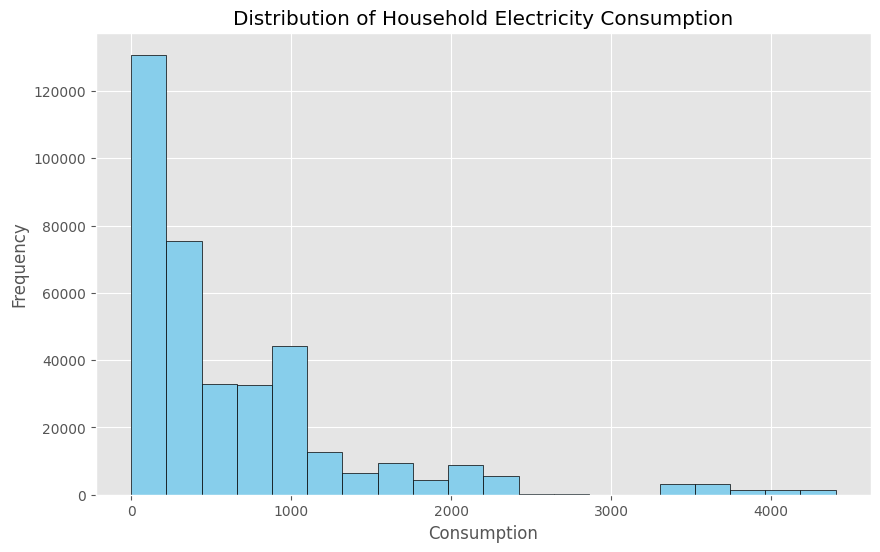

In [47]:
"""Summary Statistics"""


# Visualizing the distribution of consumption
plt.figure(figsize=(10, 6))
plt.hist(df['Import kWh (kWh)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Household Electricity Consumption')
plt.show()

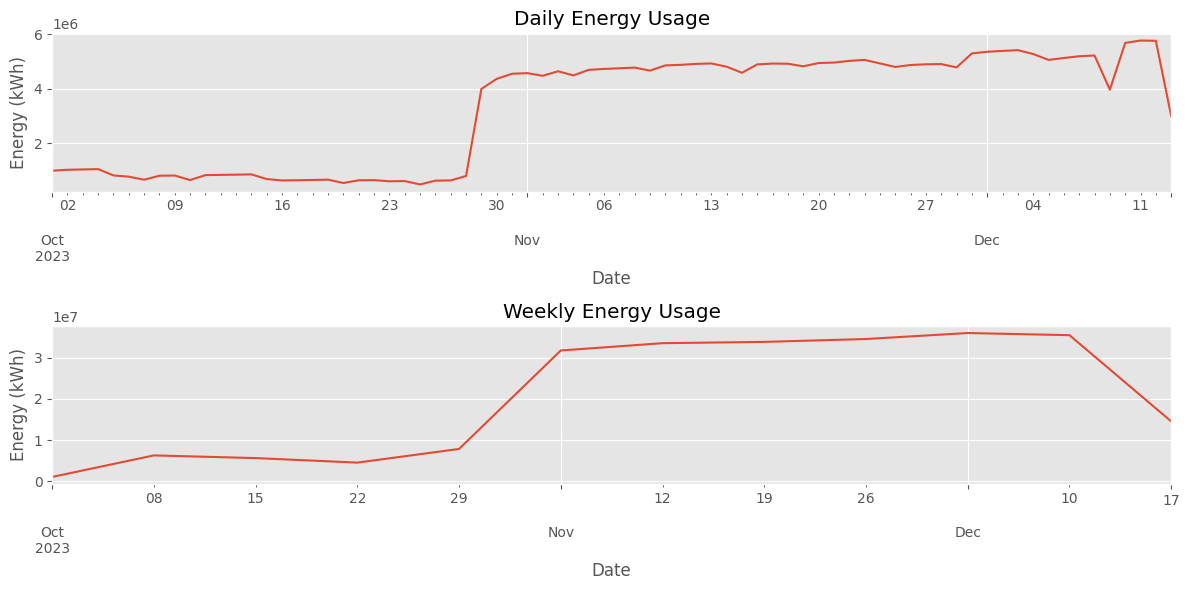

In [91]:
'''Energy Consumption Trends -  Analyze daily, weekly, or monthly variations in energy usage.'''

df.set_index('date_time_clean', inplace=True)

# Resampling data for daily variations
daily_energy = df['Import kWh (kWh)'].resample('D').sum()

# Resampling data for weekly variations
weekly_energy = df['Import kWh (kWh)'].resample('W').sum()


# Resampling data for monthly variations
#Not plottly since the data lacks at monthly level
monthly_energy = df['Import kWh (kWh)'].resample('M').sum()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Daily Plot
plt.subplot(2, 1, 1)
daily_energy.plot(title='Daily Energy Usage', xlabel='Date', ylabel='Energy (kWh)')

# Weekly Plot
plt.subplot(2, 1, 2)
weekly_energy.plot(title='Weekly Energy Usage', xlabel='Date', ylabel='Energy (kWh)')


plt.tight_layout()
plt.show()


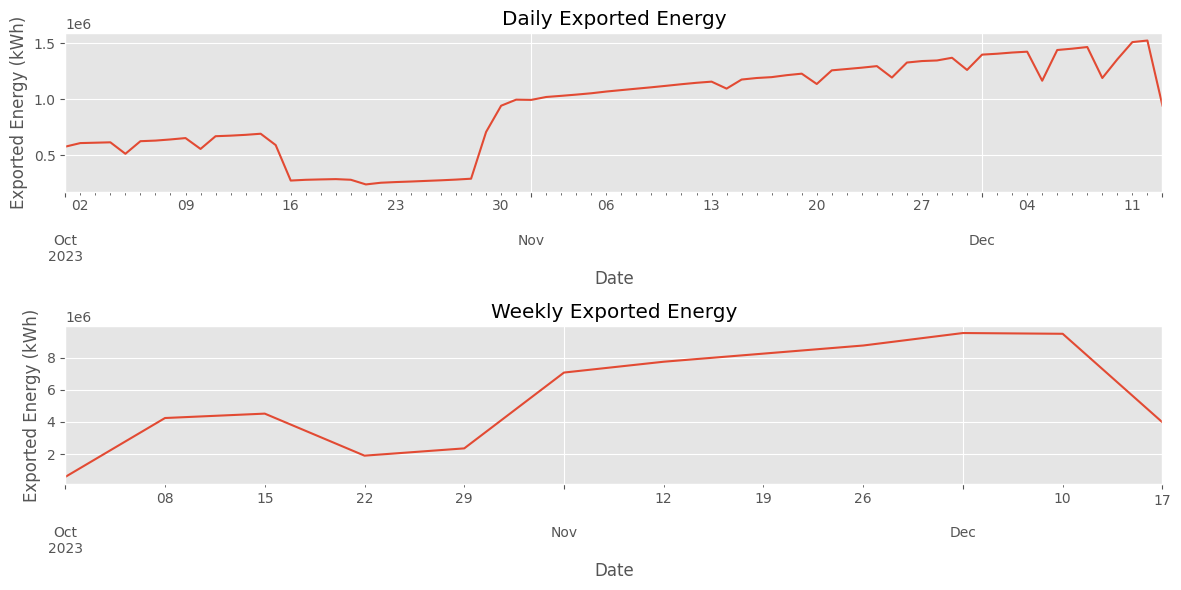

In [58]:
'''Exported Energy Analysis - Examine the 'Export kWh' column to understand instances of energy export, if applicable.'''

daily_exported_energy = df['Export kWh (kWh)'].resample('D').sum()
weekly_exported_energy = df['Export kWh (kWh)'].resample('W').sum()

# Plotting
plt.figure(figsize=(12, 6))

# Daily Plot
plt.subplot(2, 1, 1)
daily_exported_energy.plot(title='Daily Exported Energy', xlabel='Date', ylabel='Exported Energy (kWh)')

# Weekly Plot
plt.subplot(2, 1, 2)
weekly_exported_energy.plot(title='Weekly Exported Energy', xlabel='Date', ylabel='Exported Energy (kWh)')

plt.tight_layout()
plt.show()


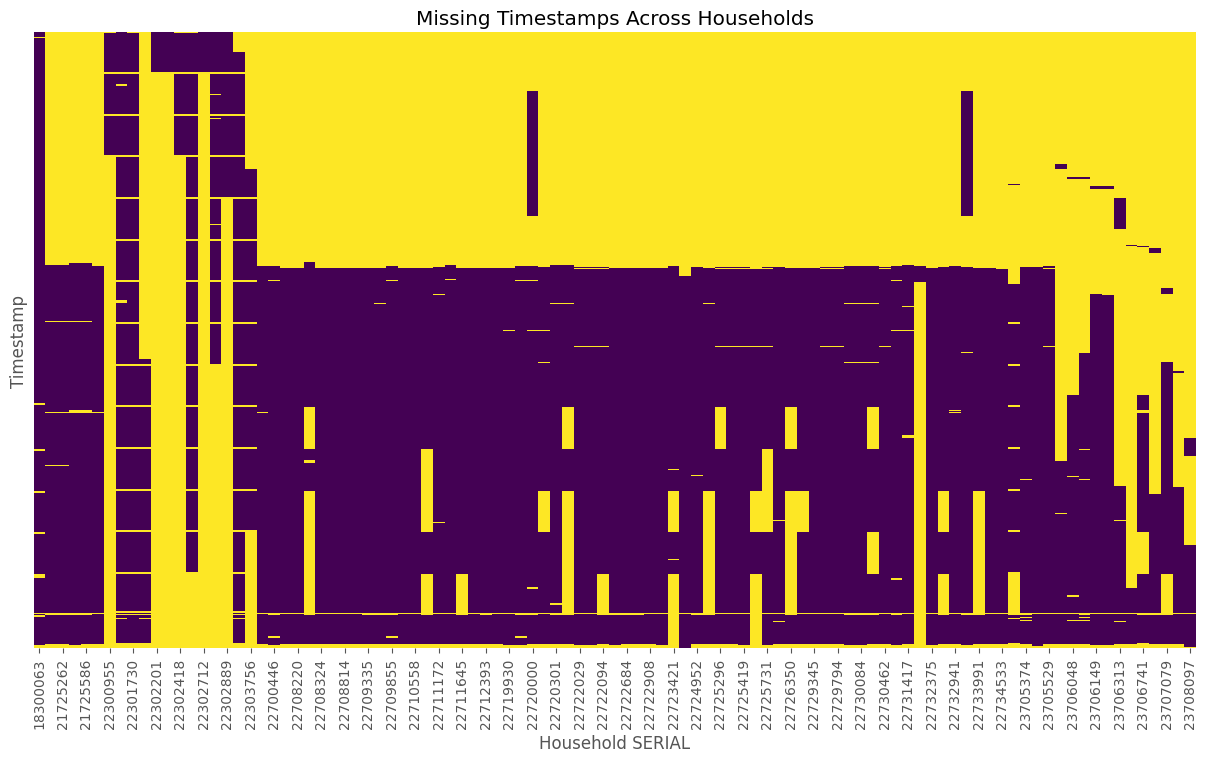

In [93]:
import seaborn as sns

# Assuming your DataFrame is named 'df'
df['TIMESTAMP'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Pivot the data to create a matrix with TIMESTAMP as index and SERIAL as columns
heatmap_data = df.pivot_table(index='TIMESTAMP', columns='SERIAL', values='Import kWh (kWh)')

# Plotting a heatmap to visualize missing values
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Timestamps Across Households')
plt.xlabel('Household SERIAL')
plt.ylabel('Timestamp')
plt.show()


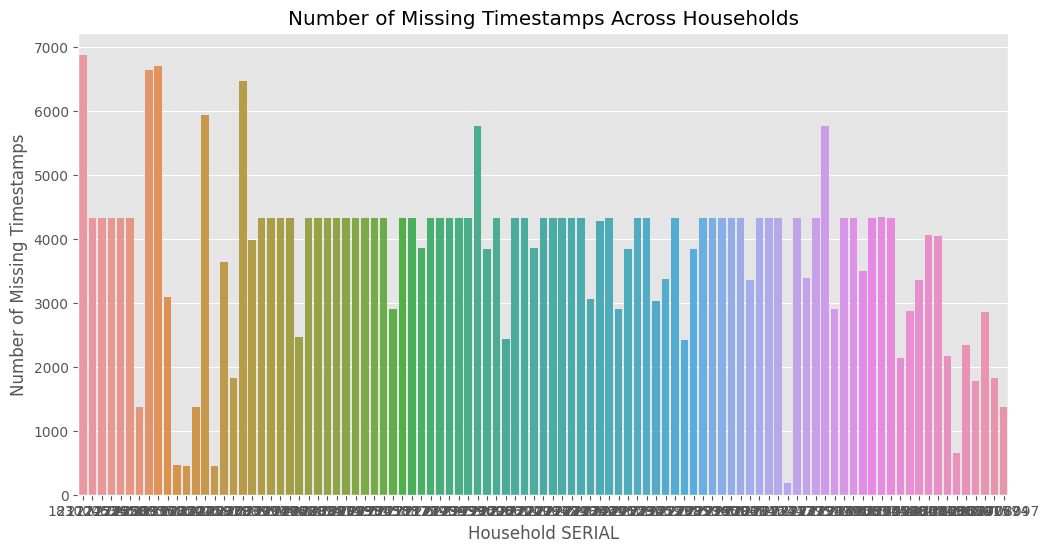

In [92]:
missing_timestamps_count = df.groupby('SERIAL')['TIMESTAMP'].count().reset_index()
missing_timestamps_count.columns = ['SERIAL', 'Missing Timestamps Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='SERIAL', y='Missing Timestamps Count', data=missing_timestamps_count)
plt.title('Number of Missing Timestamps Across Households')
plt.xlabel('Household SERIAL')
plt.ylabel('Number of Missing Timestamps')
plt.show()


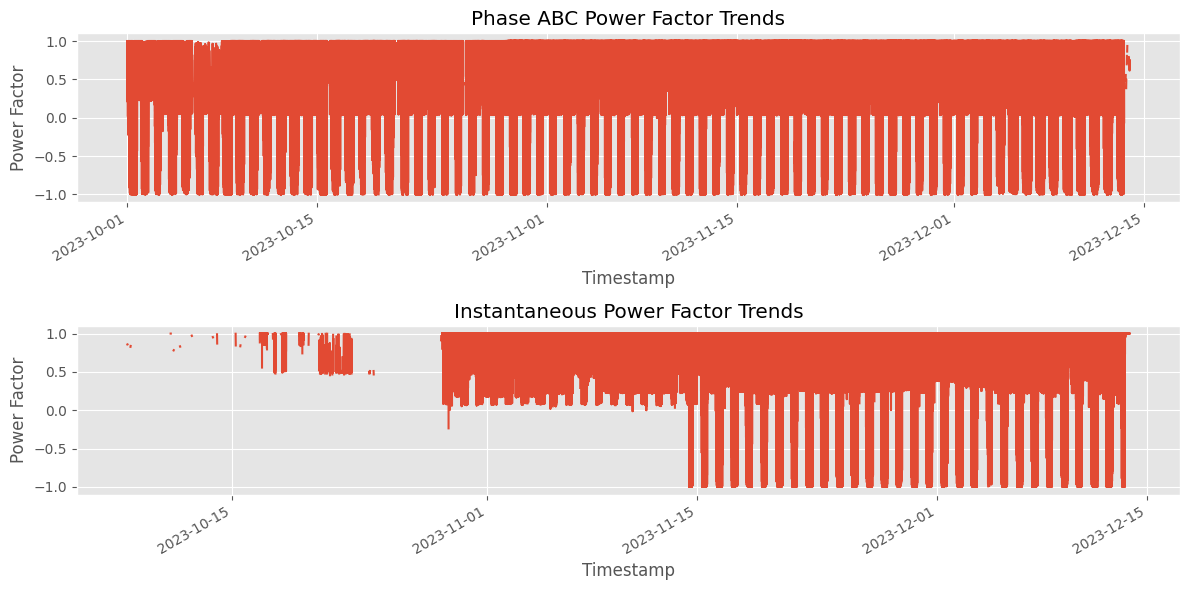

In [68]:
'''Reactive Energy Assessment - One possible evaluation could be power factor trends to gauge system efficiency.'''

df.set_index('TIMESTAMP', inplace=True)


plt.figure(figsize=(12, 6))
# Power Factor Trends
plt.subplot(2, 1, 1)
df['Phase ABC Power factor'].plot(title='Phase ABC Power Factor Trends', xlabel='Timestamp', ylabel='Power Factor')

# Instantaneous Power Factor Trends
plt.subplot(2, 1, 2)
df['Inst. Power factor'].plot(title='Instantaneous Power Factor Trends', xlabel='Timestamp', ylabel='Power Factor')

plt.tight_layout()
plt.show()


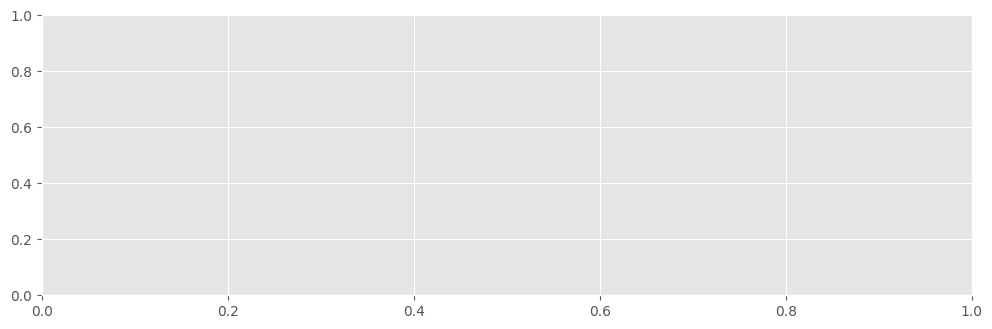

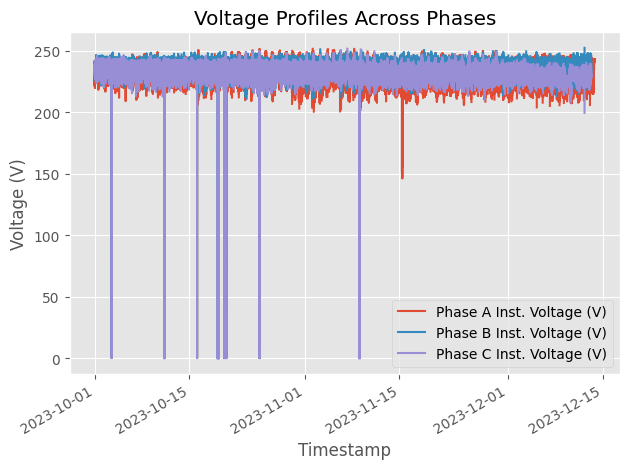

In [70]:
'''Current and Voltage Profiles
       - Could analyse variations in current and voltage across phases (issues with uneven phase distribution.).'''


# Plotting current and voltage profiles
plt.figure(figsize=(12, 8))

# Current Profiles
#plt.subplot(2, 1, 1)
#df[['Phase A Inst. Current (A)', 'Phase B Inst. Current (A)', 'Phase C Inst. Current (A)']].plot(
#    title='Current Profiles Across Phases', xlabel='Timestamp', ylabel='Current (A)'
#)

# Voltage Profiles
plt.subplot(2, 1, 2)
df[['Phase A Inst. Voltage (V)', 'Phase B Inst. Voltage (V)', 'Phase C Inst. Voltage (V)']].plot(
    title='Voltage Profiles Across Phases', xlabel='Timestamp', ylabel='Voltage (V)'
)

plt.tight_layout()
plt.show()


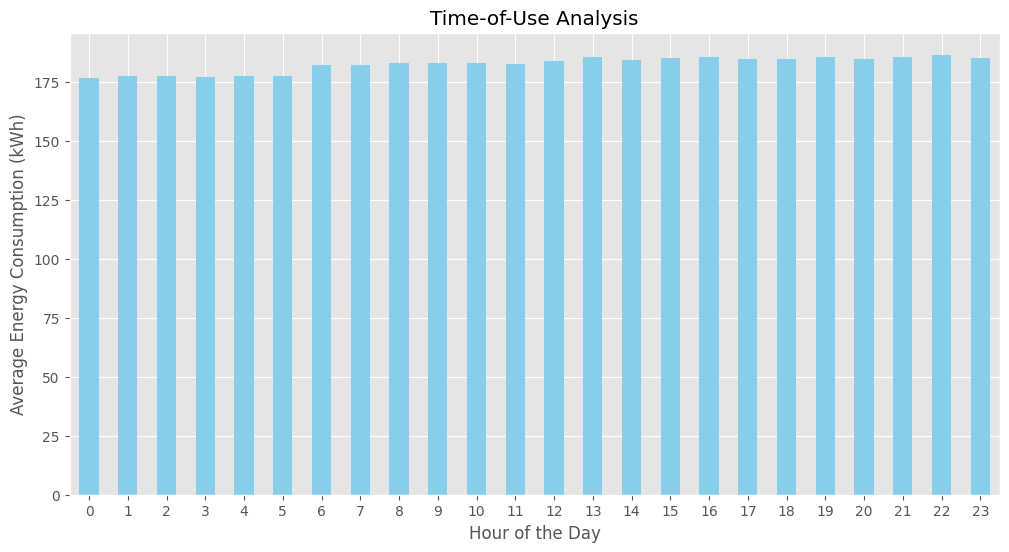

In [102]:
'''Time of use analysis'''

#df['TIMESTAMP'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
merged_df.set_index('date_time_clean', inplace=True)

merged_df['Hour'] = merged_df.index.hour

hourly_energy_consumption = merged_df.groupby('Hour')['Export kWh (kWh)'].mean()

plt.figure(figsize=(12, 6))
hourly_energy_consumption.plot(kind='bar', color='skyblue')
plt.title('Time-of-Use Analysis')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Consumption (kWh)')
plt.xticks(rotation=0)
plt.show()


### Step 4: Feature Relationships

- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons